<a href="https://colab.research.google.com/github/sapgreengem/ComputerVision/blob/main/mid_assignment/RM_Sprop_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle
import warnings

warnings.filterwarnings('ignore')
sns.set_style('dark')

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
data_dict = {0 : "Airplane",
             1 : "Car",
             2 : "Bird",
             3 : "Cat",
             4 : "Deer",
             5 : "Dog",
             6 : "Frog",
             7 : "Horse",
             8 : "Ship",
             9 : "Truck",
            }

In [5]:
def get_ten_random_images():
   
    d = {}
    while len(d.keys()) < 10:
        idx = random.randint(0, len(y_train)-1)
        if y_train[idx][0] not in d.keys():
            d[y_train[idx][0]] = idx
    return d

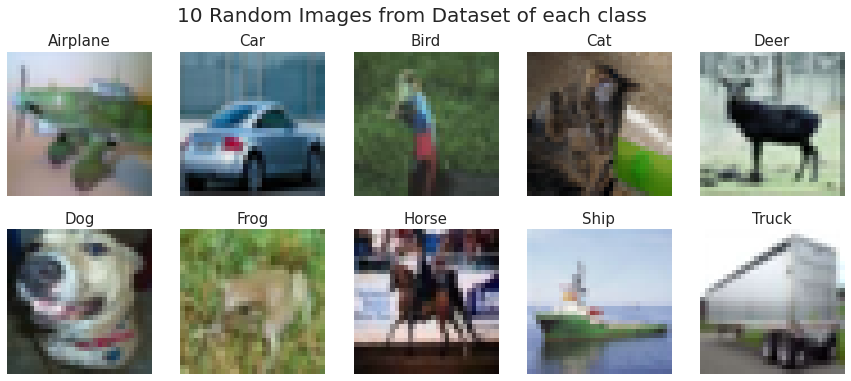

In [6]:
d = get_ten_random_images()
rows= 2
cols=5
fig,axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]])
    axes[i-1].axis('off')
    axes[i-1].set_title(data_dict[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 20)
plt.show()

In [7]:
import keras

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
mean = np.mean(X_train, axis = (0,1,2,3))
std = np.std(X_train, axis = (0,1,2,3))

In [10]:
X_train = (X_train-mean)/(std + 1e-7)
X_test = (X_test-mean)/(std + 1e-7)

In [11]:
from keras.utils import np_utils
y_train_cat = keras.utils.np_utils.to_categorical(y_train,10)
y_test_cat = keras.utils.np_utils.to_categorical(y_test,10)

In [12]:
input_shape = X_train.shape[1:]

In [13]:
input_shape

(32, 32, 3)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import regularizers
from tensorflow.keras import optimizers
from keras.optimizers import rmsprop_v2
import tensorflow as tf

In [15]:
weight_decay = 1e-4

In [16]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', input_shape = input_shape, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(units = 10, activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.RMSprop(lr = 0.001, decay = 1e-6), metrics=['accuracy'])

In [19]:
epochs_hist = model.fit(X_train, y_train_cat, batch_size=64, epochs=50, validation_split=0.2, shuffle=True)

Epoch 1/50
625/625 [==============================] - 37s 42ms/step - loss: 1.8096 - accuracy: 0.4645 - val_loss: 1.1901 - val_accuracy: 0.6281
Epoch 2/50
625/625 [==============================] - 26s 41ms/step - loss: 1.1431 - accuracy: 0.6345 - val_loss: 0.9647 - val_accuracy: 0.6849
Epoch 3/50
625/625 [==============================] - 26s 41ms/step - loss: 0.9482 - accuracy: 0.6999 - val_loss: 0.8335 - val_accuracy: 0.7422
Epoch 4/50
625/625 [==============================] - 26s 41ms/step - loss: 0.8398 - accuracy: 0.7395 - val_loss: 0.7994 - val_accuracy: 0.7513
Epoch 5/50
625/625 [==============================] - 26s 41ms/step - loss: 0.7693 - accuracy: 0.7629 - val_loss: 0.7552 - val_accuracy: 0.7755
Epoch 6/50
625/625 [==============================] - 26s 41ms/step - loss: 0.7147 - accuracy: 0.7858 - val_loss: 0.7144 - val_accuracy: 0.7951
Epoch 7/50
625/625 [==============================] - 26s 41ms/step - loss: 0.6708 - accuracy: 0.8025 - val_loss: 0.6645 - val_accuracy:

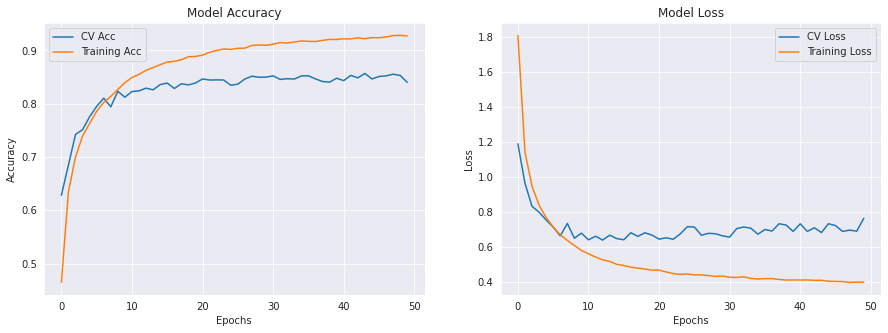

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_hist.history['val_accuracy'], label = 'CV Acc')
plt.plot(epochs_hist.history['accuracy'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()